In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [2]:
# Libray for Data Manipulation.
import pandas as pd
import numpy as np

#Library for Data Visualization.
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.io import arff

# Library to Display whole Dataset.
pd.set_option("display.max.columns",100)


In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

In [4]:
def transform(X):
    eps=1e-5
    X['Height']=np.log(X['Height']+eps)
    X['Whole weight']=np.log(X['Whole weight']+eps)
    X['Whole weight.1']=np.log(X['Whole weight.1']+eps)
    X['Whole weight.2']=np.log(X['Whole weight.2']+eps)
    X['Shell weight']=np.log(X['Shell weight']+eps)
    return X

In [5]:
train_df = transform(train_df)
test_df = transform(test_df)

In [6]:
def map(df):
    df["Sex"] = df["Sex"].replace({"F":0 ,"M":1,"I":2})
    return df

map(train_df)
map(test_df)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,1,0.645,0.475,-1.864266,0.213505,-0.480442,-1.163119,-1.202274
1,90616,1,0.580,0.460,-1.832519,-0.017136,-0.737078,-1.516357,-1.290948
2,90617,1,0.560,0.420,-1.966041,-0.174937,-1.042676,-1.690052,-1.424994
3,90618,1,0.570,0.490,-1.930953,-0.134663,-1.042676,-1.679270,-1.448127
4,90619,2,0.415,0.325,-2.207184,-1.027194,-1.848266,-2.702913,-2.253700
...,...,...,...,...,...,...,...,...,...
60406,151021,2,0.345,0.260,-2.464986,-1.728728,-2.610334,-3.630233,-2.995532
60407,151022,0,0.525,0.410,-1.930953,-0.168999,-0.945436,-1.789702,-1.584697
60408,151023,2,0.590,0.440,-1.864266,0.115122,-0.933920,-1.609388,-1.327988
60409,151024,0,0.660,0.525,-1.660679,0.401129,-0.530161,-1.028592,-0.832386


In [7]:
x = train_df.drop(['Rings'], axis=1)
y = train_df[['Rings']]

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = RobustScaler()
standardscl = StandardScaler()
minmax = MinMaxScaler()

In [9]:
x_scaled = minmax.fit_transform(x)
test_df_scaled = minmax.transform(test_df)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Machine learning algorithms
# Importing from scikit-learn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, SGDRegressor, BayesianRidge, PoissonRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# Importing from XGBoost
from xgboost import XGBRegressor

# Importing from LightGBM
from lightgbm import LGBMRegressor

# Importing from CatBoost
from catboost import CatBoostRegressor

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold, cross_val_predict
#from scikeras.wrappers import KerasClassifier
from tqdm import tqdm


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import KFold

# for model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

2024-04-25 15:46:32.455492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 15:46:32.455718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 15:46:32.609914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# to perform model check for preliminary model selection


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

def model_prediction_regression(model, x, y, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    mse_scores = []
    mae_scores = []
    msle_scores = []

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        msle = mean_squared_log_error(y_test, y_pred)

        mse_scores.append(mse)
        mae_scores.append(mae)
        msle_scores.append(msle)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Squared Error of {model} model is:", np.mean(mse_scores))
    print(f"Mean Absolute Error of {model} model is:", np.mean(mae_scores))
    print(f"Mean Squared Logarithmic Error of {model} model is:", np.mean(msle_scores))
    print("\n------------------------------------------------------------------------")


In [14]:
# model_prediction_regression(XGBRegressor(), x, y)
# model_prediction_regression(LGBMRegressor(), x, y)
# model_prediction_regression(PoissonRegressor(), x, y)
# model_prediction_regression(GradientBoostingRegressor(), x, y)
# model_prediction_regression(RandomForestRegressor(), x, y)
# model_prediction_regression(AdaBoostRegressor(), x, y)
# model_prediction_regression(KNeighborsRegressor(), x, y)
# # model_prediction_regression(MLPRegressor(), x, y)
# model_prediction_regression(CatBoostRegressor(), x, y)

# hyper parameter search


## XGBoost

In [15]:
import optuna
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 10)
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    gamma = trial.suggest_float('gamma', 0, 1)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 2)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 2)
    min_child_weight = trial.suggest_int('min_child_weight', 0, 10)
    subsample = trial.suggest_float('subsample', 0, 1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0, 1)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1)
    
    print('Training the model with', x.shape[1], 'features')
    
    params = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'gamma': gamma,
              'reg_alpha': reg_alpha,
              'reg_lambda': reg_lambda,
              'max_depth': max_depth,
              'min_child_weight': min_child_weight,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree}
        
    clf = XGBRegressor(**params)
    
    cv_results = cross_validate(clf, x, y, cv=5, scoring='neg_mean_squared_log_error')
    
    validation_score = -np.mean(cv_results['test_score'])
    
    return validation_score


In [16]:
# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=100)

In [17]:
best_params = {'max_depth': 10, 'n_estimators': 1903, 'gamma': 0.48489414690119154, 'reg_alpha': 0.9817688431718927, 'reg_lambda': 1.054041968794575, 'min_child_weight': 4, 'subsample': 0.6028799701056924, 'colsample_bytree': 0.7213687172852714, 'learning_rate': 0.042514621769262045}
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 1903, 'gamma': 0.48489414690119154, 'reg_alpha': 0.9817688431718927, 'reg_lambda': 1.054041968794575, 'min_child_weight': 4, 'subsample': 0.6028799701056924, 'colsample_bytree': 0.7213687172852714, 'learning_rate': 0.042514621769262045}


In [18]:
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7213687172852714, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.48489414690119154,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.042514621769262045,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1903, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
# # feature importances
# feature_importance = xgb_model.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# plt.figure(figsize=(12, 10))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.title('Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('')
# sns.despine(left=True, bottom=True)
# plt.show()

## LGBM

In [20]:
import optuna
from sklearn.model_selection import cross_validate
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 20000, 300000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 2),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 2),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 1, 10),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.001, 0.1)
    }

    print('Training the model with', x.shape[1], 'features')
    
    clf = LGBMRegressor(**params)
    
    cv_results = cross_validate(clf, x, y, cv=5, scoring='neg_mean_squared_log_error')
    
    validation_score = -np.mean(cv_results['test_score'])
    
    return validation_score

In [21]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

In [22]:
best_params = {'num_leaves': 55, 'max_depth': 7, 'learning_rate': 0.011288622256729343, 'n_estimators': 1802, 'subsample_for_bin': 213273, 'min_child_samples': 22, 'reg_alpha': 0.357379471374121, 'reg_lambda': 0.23951278891969885, 'colsample_bytree': 0.6386346382415936, 'subsample': 0.5442713690205855, 'subsample_freq': 2, 'min_child_weight': 0.004162148474094218}
print("Best params:", best_params)

Best params: {'num_leaves': 55, 'max_depth': 7, 'learning_rate': 0.011288622256729343, 'n_estimators': 1802, 'subsample_for_bin': 213273, 'min_child_samples': 22, 'reg_alpha': 0.357379471374121, 'reg_lambda': 0.23951278891969885, 'colsample_bytree': 0.6386346382415936, 'subsample': 0.5442713690205855, 'subsample_freq': 2, 'min_child_weight': 0.004162148474094218}


In [23]:
lgbm_model = LGBMRegressor(**best_params)
lgbm_model.fit(x, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1591
[LightGBM] [Info] Number of data points in the train set: 90615, number of used features: 9
[LightGBM] [Info] Start training from score 9.696794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

LGBMRegressor(colsample_bytree=0.6386346382415936,
              learning_rate=0.011288622256729343, max_depth=7,
              min_child_samples=22, min_child_weight=0.004162148474094218,
              n_estimators=1802, num_leaves=55, reg_alpha=0.357379471374121,
              reg_lambda=0.23951278891969885, subsample=0.5442713690205855,
              subsample_for_bin=213273, subsample_freq=2)

In [24]:
# # feature importances
# feature_importance = lgbm_model.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# plt.figure(figsize=(12, 10))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.title('Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('')
# sns.despine(left=True, bottom=True)
# plt.show()

## gradient boosting

In [25]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 10)
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    
    print('Training the model with', x.shape[1], 'features')
    
    params = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'subsample': subsample,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_depth': max_depth,
              'max_features': max_features}
        
    clf = GradientBoostingRegressor(**params)
    
    cv_results = cross_validate(clf, x, y, cv=5, scoring='neg_mean_squared_log_error')
    
    validation_score = -np.mean(cv_results['test_score'])
    
    return validation_score

In [26]:
# Create a study object and optimize the objective function
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=20)

In [27]:
# Get the best parameters
best_params = {'max_depth': 3, 'n_estimators': 479, 'learning_rate': 0.016408833643389454, 'subsample': 0.984934719887546, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 0.5746125387619104}
print("Best params:", best_params)

Best params: {'max_depth': 3, 'n_estimators': 479, 'learning_rate': 0.016408833643389454, 'subsample': 0.984934719887546, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 0.5746125387619104}


In [28]:
gb_model = GradientBoostingRegressor(verbose=0,**best_params)
gb_model.fit(x, y)

GradientBoostingRegressor(learning_rate=0.016408833643389454,
                          max_features=0.5746125387619104, min_samples_leaf=10,
                          min_samples_split=10, n_estimators=479,
                          subsample=0.984934719887546)

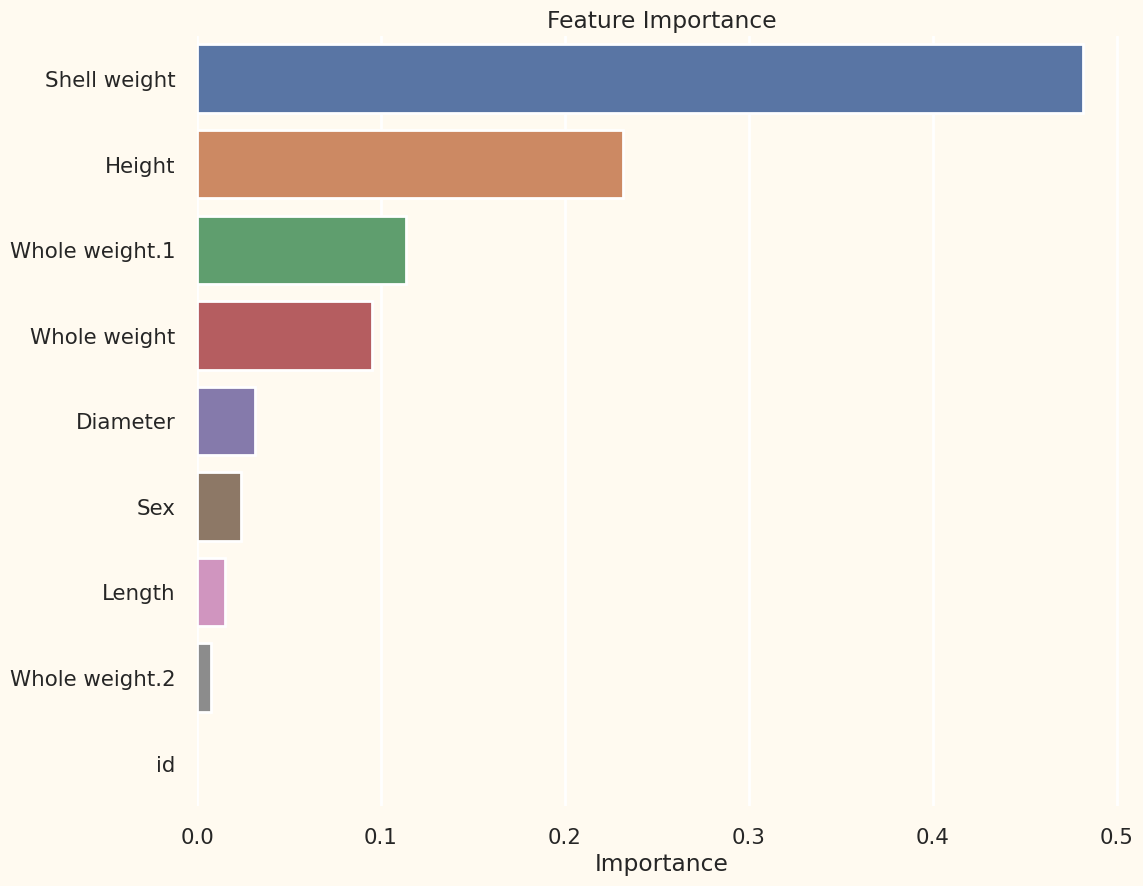

In [29]:
# feature importances
feature_importance = gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

## catboost


In [30]:
from sklearn.model_selection import cross_validate
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 10)
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 1, 20)
    reg_lambda = trial.suggest_float('reg_lambda', 0.0, 2.0)
    colsample_bylevel = trial.suggest_float('colsample_bylevel', 0.1, 1.0)
    random_strength = trial.suggest_float('random_strength', 0.0, 1.0)
    
    print('Training the model with', x.shape[1], 'features')
    
    params = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'subsample': subsample,
              'max_depth': max_depth,
              'min_data_in_leaf': min_data_in_leaf,
              'reg_lambda': reg_lambda,
              'colsample_bylevel': colsample_bylevel,
              'random_strength': random_strength,
              #2'task_type': 'GPU',  # Use GPU acceleration
              'verbose': False}    # Disable verbose mode to reduce output
    
    clf = CatBoostRegressor(**params)
    
    cv_results = cross_validate(clf, x, y, cv=5, scoring='neg_mean_squared_log_error')
    
    validation_score = -np.mean(cv_results['test_score'])
    
    return validation_score

In [31]:
# Create a study object and optimize the objective function
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

In [32]:
# Print the best hyperparameters found
best_params = {'max_depth': 7, 'n_estimators': 1522, 'learning_rate': 0.04218657906936798, 'subsample': 0.7053089094577327, 'min_data_in_leaf': 5, 'reg_lambda': 0.7565520485057433, 'colsample_bylevel': 0.8793262938828783, 'random_strength': 0.23310494744383697}
print("Best params:", best_params)


Best params: {'max_depth': 7, 'n_estimators': 1522, 'learning_rate': 0.04218657906936798, 'subsample': 0.7053089094577327, 'min_data_in_leaf': 5, 'reg_lambda': 0.7565520485057433, 'colsample_bylevel': 0.8793262938828783, 'random_strength': 0.23310494744383697}


In [33]:
catboost_model = CatBoostRegressor(logging_level="Silent",**best_params)
catboost_model.fit(x, y)

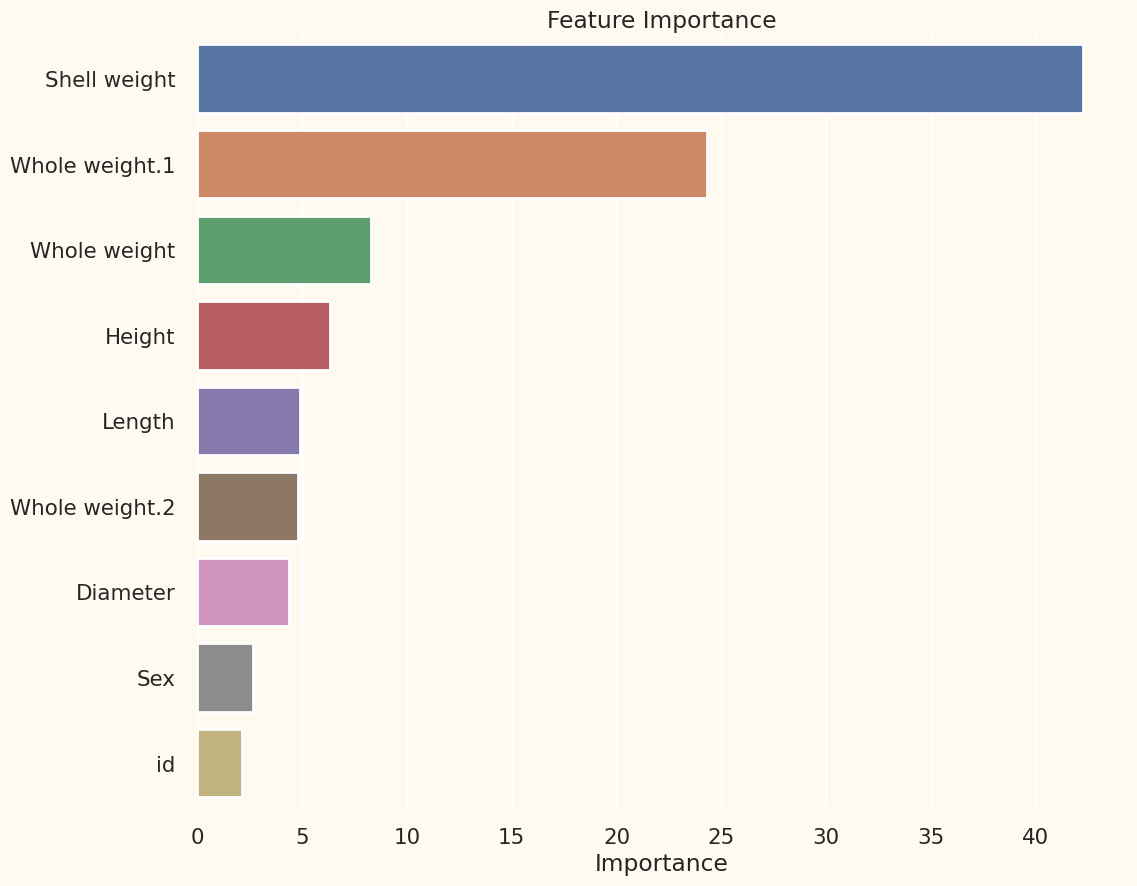

In [34]:
# feature importances
feature_importance = catboost_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

## random forest

In [35]:
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Define the model with the suggested parameters
    clf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42  # Ensure reproducibility
    )
    
    # Perform cross-validation
    cv_results = cross_validate(clf, x, y, cv=5, scoring='neg_mean_squared_log_error')
    
    # Calculate the mean of the validation scores (note the negative sign is removed for mean squared log error)
    validation_score = -np.mean(cv_results['test_score'])
    
    return validation_score

In [36]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=20)

In [37]:
best_params = {'n_estimators': 495, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': True}
random_forest_model = RandomForestRegressor(**best_params)
random_forest_model.fit(x,y)

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=10,
                      n_estimators=495)

## poisson reg

In [38]:
import optuna
import numpy as np
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_poisson_deviance

def objective(trial):
    # Suggest hyperparameters
    alpha = trial.suggest_float('alpha', 0.0, 1.0)  # Regularization parameter
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    max_iter = trial.suggest_int('max_iter', 50, 300)  # Maximum number of iterations
    
    # Define the model with the suggested parameters
    model = PoissonRegressor(alpha=alpha, fit_intercept=fit_intercept, max_iter=max_iter)
    
    # Perform cross-validation
    cv_results = cross_validate(model, x, y, cv=5, scoring='neg_mean_poisson_deviance')
    
    # Calculate the mean of the validation scores (note the negative sign is removed for mean poisson deviance)
    validation_score = -np.mean(cv_results['test_score'])
    
    return validation_score


In [39]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

[I 2024-04-25 15:50:06,670] A new study created in memory with name: no-name-4750255f-27f7-403d-b5ee-94579b5908a2
[I 2024-04-25 15:50:09,436] Trial 0 finished with value: 0.7652888865058041 and parameters: {'alpha': 0.9553892983058364, 'fit_intercept': True, 'max_iter': 263}. Best is trial 0 with value: 0.7652888865058041.
[I 2024-04-25 15:50:09,796] Trial 1 finished with value: 27.642161998718404 and parameters: {'alpha': 0.5948972633557547, 'fit_intercept': False, 'max_iter': 160}. Best is trial 0 with value: 0.7652888865058041.
[I 2024-04-25 15:50:10,047] Trial 2 finished with value: 27.642161998718404 and parameters: {'alpha': 0.8162920754219247, 'fit_intercept': False, 'max_iter': 125}. Best is trial 0 with value: 0.7652888865058041.
[I 2024-04-25 15:50:11,949] Trial 3 finished with value: 0.7377891446463463 and parameters: {'alpha': 0.18441397774367718, 'fit_intercept': True, 'max_iter': 193}. Best is trial 3 with value: 0.7377891446463463.
[I 2024-04-25 15:50:12,300] Trial 4 fin

In [40]:
best_params = study.best_params
print("Best params:", best_params)

Best params: {'alpha': 0.008580126191594581, 'fit_intercept': True, 'max_iter': 228}


In [41]:
# poisson_model = PoissonRegressor(**best_params)
# poisson_model.fit(x,y)

# voting classifier

In [42]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Create a voting ensemble model without specifying the voting method (default is averaging)
ensemble_model = VotingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('gb', gb_model),
        ('catboost',catboost_model),
#         ('random forest', random_forest_model)
#         ('poisson', poisson_model)
    ]
)

# Define MSLE as the scoring parameter
scorer = make_scorer(mean_squared_log_error, greater_is_better=False)

# Use cross-validation to evaluate the ensemble model
msle_scores = cross_val_score(ensemble_model, x, y, cv=5, scoring=scorer)

print("MSLE scores for each fold:", msle_scores)
print("Average MSLE:", msle_scores.mean())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1586
[LightGBM] [Info] Number of data points in the train set: 72492, number of used features: 9
[LightGBM] [Info] Start training from score 9.705223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [43]:
ensemble_model.fit(x,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1591
[LightGBM] [Info] Number of data points in the train set: 90615, number of used features: 9
[LightGBM] [Info] Start training from score 9.696794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.7213687172852714,
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0.48489414690119154,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_c...
                                           reg_lambda=0.23951278891969885,
                                           subsample=0.5442713690205855,
                                           subsample_for_bin=213273,
                                           subsample_freq=2)),
                            ('gb',
                             GradientBoostingRegressor(learning_rate=0.016408833643389454,
                                                       max_features=0.5746125387619104,
                                                       min_samples_leaf=10,
                                                       min_samples_split=10,
                                                       n_estimators=479,
                                                       subsample=0.984934719887546)),
                            ('catboost',
                             <catboost.core.CatBoostRegressor object at 0x797c337c7c10>)])

# submission

In [44]:
y_pred = ensemble_model.predict(test_df)
df = pd.read_csv('/kaggle/input/playground-series-s4e4/sample_submission.csv')
df['Rings'] = y_pred
df.to_csv("submission.csv", index=False,header=True)